# Task 1.3: Geospatial Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import geodatasets
import folium

In [2]:
pd.set_option('display.max_columns', None) # show full dataframe

In [3]:
# import data
train_val = pd.read_csv("../data/training_set_values.csv")
train_label = pd.read_csv("../data/training_set_labels.csv")

In [4]:
# merge train_set_values and train_set_labels on ID
train_data = pd.merge(train_val, train_label, on="id")

In [5]:
drop_columns = ["date_recorded", "funder", "installer", "wpt_name", "subvillage", "ward",
                "public_meeting", "recorded_by", "scheme_name"]

duplicated_columns = ["extraction_type", "management_group", "payment_type",
                     "quantity_group", "source_type"]

categorical_columns = ["basin", "region", "lga", "scheme_management", "permit",
                        "extraction_type_group", "extraction_type_class",
                       "management", "payment",
                       "water_quality",  "quality_group", "quantity", "source", "source_class",
                       "waterpoint_type", "waterpoint_type_group", "status_group"]

In [6]:
# test by dropping unnecessary columns

train_data = train_data.drop(columns=drop_columns)
train_data = train_data.drop(columns=duplicated_columns)

In [7]:
# encode categorical data into numeric data

for col in categorical_columns:
        
    codes, uniques = pd.factorize(train_data[col])
    train_data[f"{col}_encoded"] = codes

uniques

Index(['functional', 'non functional', 'functional needs repair'], dtype='object')

In [8]:
train_data

,id,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,lga,population,scheme_management,permit,construction_year,extraction_type_group,extraction_type_class,management,payment,water_quality,quality_group,quantity,source,source_class,waterpoint_type,waterpoint_type_group,status_group,basin_encoded,region_encoded,lga_encoded,scheme_management_encoded,permit_encoded,extraction_type_group_encoded,extraction_type_class_encoded,management_encoded,payment_encoded,water_quality_encoded,quality_group_encoded,quantity_encoded,source_encoded,source_class_encoded,waterpoint_type_encoded,waterpoint_type_group_encoded,status_group_encoded
0,69572,6000.0,1390,34.938093,-9.856322,0,Lake Nyasa,Iringa,11,5,Ludewa,109,VWC,False,1999,gravity,gravity,vwc,pay annually,soft,good,enough,spring,groundwater,communal standpipe,communal standpipe,functional,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8776,0.0,1399,34.698766,-2.147466,0,Lake Victoria,Mara,20,2,Serengeti,280,Other,True,2010,gravity,gravity,wug,never pay,soft,good,insufficient,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,1,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0
2,34310,25.0,686,37.460664,-3.821329,0,Pangani,Manyara,21,4,Simanjiro,250,VWC,True,2009,gravity,gravity,vwc,pay per bucket,soft,good,enough,dam,surface,communal standpipe multiple,communal standpipe,functional,2,2,2,0,1,0,0,0,2,0,0,0,2,1,1,0,0
3,67743,0.0,263,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,58,VWC,True,1986,submersible,submersible,vwc,never pay,soft,good,dry,machine dbh,groundwater,communal standpipe multiple,communal standpipe,non functional,3,3,3,0,1,1,1,0,1,0,0,2,3,0,1,0,1
4,19728,0.0,0,31.130847,-1.825359,0,Lake Victoria,Kagera,18,1,Karagwe,0,NaN,True,0,gravity,gravity,other,never pay,soft,good,seasonal,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,4,4,-1,1,0,0,2,1,0,0,3,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1210,37.169807,-3.253847,0,Pangani,Kilimanjaro,3,5,Hai,125,Water Board,True,1999,gravity,gravity,water board,pay per bucket,soft,good,enough,spring,groundwater,communal standpipe,communal standpipe,functional,2,10,63,4,1,0,0,4,2,0,0,0,0,0,0,0,0
59396,27263,4700.0,1212,35.249991,-9.070629,0,Rufiji,Iringa,11,4,Njombe,56,VWC,True,1996,gravity,gravity,vwc,pay annually,soft,good,enough,river,surface,communal standpipe,communal standpipe,functional,7,0,15,0,1,0,0,0,0,0,0,0,6,1,0,0,0
59397,37057,0.0,0,34.017087,-8.750434,0,Rufiji,Mbeya,12,7,Mbarali,0,VWC,False,0,swn 80,handpump,vwc,pay monthly,fluoride,fluoride,enough,machine dbh,groundwater,hand pump,hand pump,functional,7,17,44,0,0,2,2,0,6,4,4,0,3,0,2,1,0
59398,31282,0.0,0,35.861315,-6.378573,0,Rufiji,Dodoma,1,4,Chamwino,0,VWC,True,0,nira/tanira,handpump,vwc,never pay,soft,good,insufficient,shallow well,groundwater,hand pump,hand pump,functional,7,15,23,0,1,3,2,0,1,0,0,1,5,0,2,1,0


In [9]:
gdf = gpd.GeoDataFrame(
    train_data, geometry=gpd.points_from_xy(train_data.longitude, train_data.latitude), crs="EPSG:4326"
)
gdf.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,lga,population,scheme_management,permit,construction_year,extraction_type_group,extraction_type_class,management,payment,water_quality,quality_group,quantity,source,source_class,waterpoint_type,waterpoint_type_group,status_group,basin_encoded,region_encoded,lga_encoded,scheme_management_encoded,permit_encoded,extraction_type_group_encoded,extraction_type_class_encoded,management_encoded,payment_encoded,water_quality_encoded,quality_group_encoded,quantity_encoded,source_encoded,source_class_encoded,waterpoint_type_encoded,waterpoint_type_group_encoded,status_group_encoded,geometry
0,69572,6000.0,1390,34.938093,-9.856322,0,Lake Nyasa,Iringa,11,5,Ludewa,109,VWC,False,1999,gravity,gravity,vwc,pay annually,soft,good,enough,spring,groundwater,communal standpipe,communal standpipe,functional,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,POINT (34.93809 -9.85632)
1,8776,0.0,1399,34.698766,-2.147466,0,Lake Victoria,Mara,20,2,Serengeti,280,Other,True,2010,gravity,gravity,wug,never pay,soft,good,insufficient,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,1,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0,POINT (34.69877 -2.14747)
2,34310,25.0,686,37.460664,-3.821329,0,Pangani,Manyara,21,4,Simanjiro,250,VWC,True,2009,gravity,gravity,vwc,pay per bucket,soft,good,enough,dam,surface,communal standpipe multiple,communal standpipe,functional,2,2,2,0,1,0,0,0,2,0,0,0,2,1,1,0,0,POINT (37.46066 -3.82133)
3,67743,0.0,263,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,58,VWC,True,1986,submersible,submersible,vwc,never pay,soft,good,dry,machine dbh,groundwater,communal standpipe multiple,communal standpipe,non functional,3,3,3,0,1,1,1,0,1,0,0,2,3,0,1,0,1,POINT (38.48616 -11.1553)
4,19728,0.0,0,31.130847,-1.825359,0,Lake Victoria,Kagera,18,1,Karagwe,0,NaN,True,0,gravity,gravity,other,never pay,soft,good,seasonal,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,4,4,-1,1,0,0,2,1,0,0,3,1,1,0,0,0,POINT (31.13085 -1.82536)


In [10]:
def create_map(gdf: pd.DataFrame, 
               col_name: str, 
               colors: list, 
               tooltip_field: list):
    
    map = folium.Map(location=(-6.37, 34.52), zoom_start=6)


    folium.GeoJson(
        gdf,
        name="Water Pump",
        marker=folium.Circle(radius=4, fill_color="orange", fill_opacity=0.4, color="blue", weight=1),
        tooltip=folium.GeoJsonTooltip(fields=tooltip_field),
        # popup=folium.GeoJsonPopup(fields=["name", "line", "href", "notes"]),
        style_function=lambda x: {
            # "fillColor": colors[x['properties']['service_level']],
            "fillColor": colors[x['properties'][col_name]],
            "color": colors[x['properties'][col_name]],
            "radius": 60,
        },
        highlight_function=lambda x: {"fillOpacity": 0.8},
        zoom_on_click=True,
    ).add_to(map)

    return map


### status

<Axes: xlabel='region'>

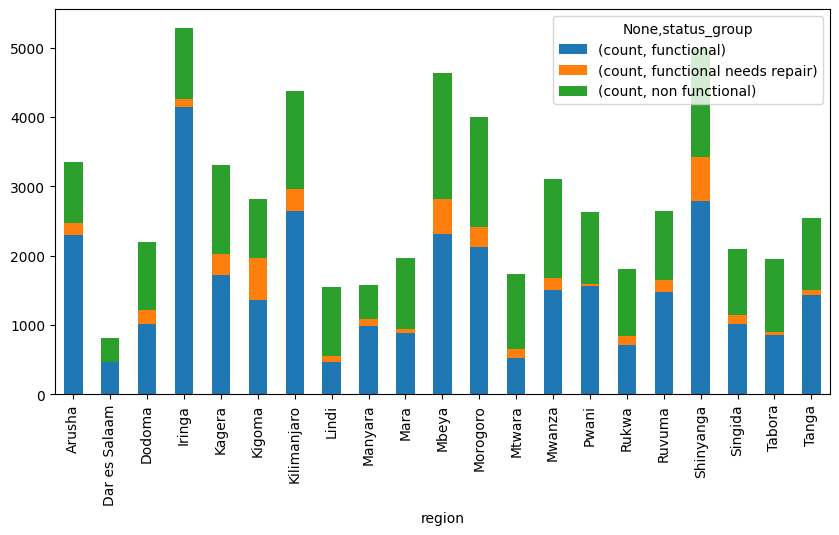

In [11]:
region_status = pd.DataFrame(gdf.groupby("region")["status_group"].value_counts())
region_status = region_status.unstack("status_group")
region_status.plot(kind="bar", stacked=True, figsize=[10, 5])

- status_group
    - more functional: Iringa, Kilimanjaro non border side, Mwanz non lake side, Arusha, 
    - more non functional: Mara, Mtwara, Tabora, Pwani, Kilimanjaro border side, Rukwa, Mwanz lake side, Lindi, Dodoma, Mbeya, Dar es Salaam
    - more need to repair: Kagera, Kigoma lake side

### construction_year

In [12]:
# no age water pump by region

test = gdf.loc[gdf["construction_year"]==0]

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group"])

map.save("../output/age_zero.html")

In [13]:
# young water pump by region

test = gdf[(gdf["construction_year"] != 0) & (gdf["construction_year"] >= 2000)]

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group"])

map.save("../output/age_young.html")

In [14]:
# aged water pump by region

test = gdf[(gdf["construction_year"] != 0) & (gdf["construction_year"] < 2000)]
print(len(test))

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group"])

map.save("../output/age_old.html")

18200


- construcion_year
    - before 2000 -> more non functional
    - after 2000 -> more functional
    - year=0 locates around between Lake Rukuwa and Lake Malawi, Dodoma, North waest area

### water quality

<Axes: xlabel='region'>

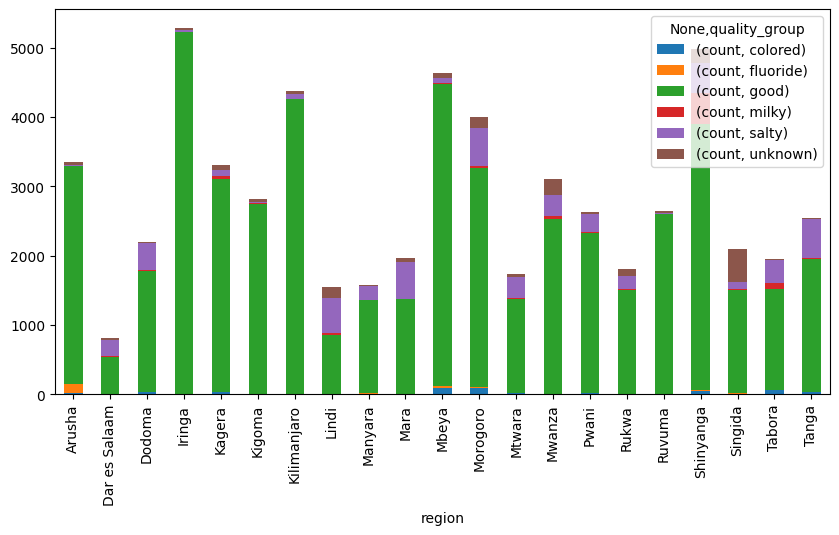

In [15]:
region_quality = pd.DataFrame(gdf.groupby("region")["quality_group"].value_counts())
region_quality = region_quality.unstack("quality_group")
region_quality.plot(kind="bar", stacked=True, figsize=[10, 5])

In [16]:
gdf["quality_group"].unique()

array(['good', 'salty', 'milky', 'unknown', 'fluoride', 'colored'],
      dtype=object)

In [17]:
# not good water quality by region

test = gdf.loc[gdf["quality_group"] != "good"]

map = create_map(gdf=test,
                col_name="quality_group_encoded",
                colors=["blue", "orange", "brown", "red", "purple", "green"],
                tooltip_field=["id", "construction_year", "status_group", "water_quality"])

map.save("../output/not_good_water_quality.html")

In [18]:
# good water quality by region

test = gdf.loc[gdf["quality_group"] == "good"]

map = create_map(gdf=test,
                col_name="quality_group_encoded",
                colors=["blue","green", "orange", "red", "purple"],
                tooltip_field=["id", "construction_year", "status_group", "water_quality"])

map.save("../output/good_water_quality.html")

In [19]:
# status by good water qauality

test = gdf.loc[gdf["quality_group"] == "good"]

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group", "water_quality"])

map.save("../output/stauts_by_good_water_quality.html")

In [20]:
# status by not good water quality

test = gdf.loc[gdf["quality_group"] != "good"]

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group", "water_quality"])

map.save("../output/status_by_not_good_water_quality.html")

- water quality
    - salty locates more in coast side
    - milky locates in Usagara district in Misungwi region and in Kahama (which is between Geita and Shinyanga region)
    - fluoride mostly locates in Arusha region
    - fluoride abandoned mostly non functional. it's sparsly distributed over the Tanzania
    - coloured mostly localtes in palce begin away from water source
    - unkwnon mostly is non functional and localtes especially around Shingida. It can be correlate with year==0.
    - maybe better to use quality_group instead of water_quality because distribution is similar and more data points non soft water

### quantity

<Axes: xlabel='region'>

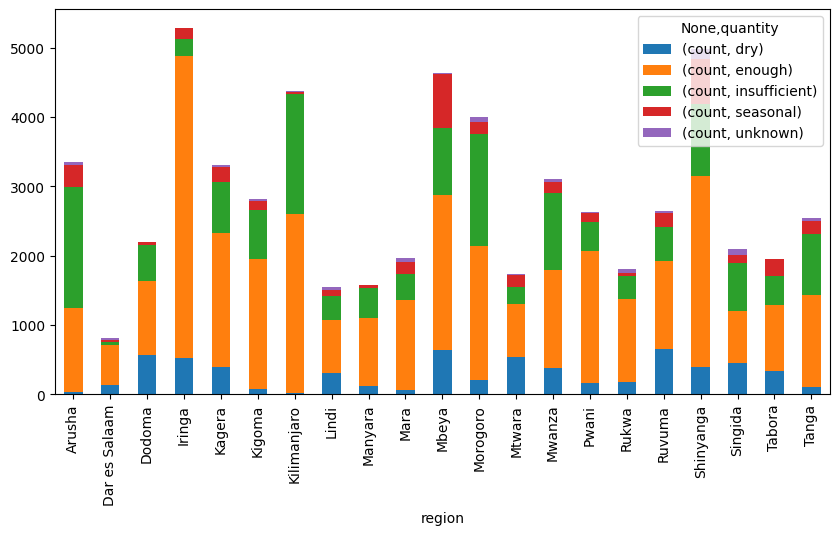

In [21]:
region_quantity = pd.DataFrame(gdf.groupby("region")["quantity"].value_counts())
region_quantity = region_quantity.unstack("quantity")
region_quantity.plot(kind="bar", stacked=True, figsize=[10, 5])

In [22]:
gdf.quantity.unique()

array(['enough', 'insufficient', 'dry', 'seasonal', 'unknown'],
      dtype=object)

In [23]:
# status by enough

test = gdf.loc[gdf["quantity"] =="enough"]

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group", "quantity"])

map.save("../output/status_by_enough_quantity.html")

In [24]:
# status by insufficient

test = gdf.loc[gdf["quantity"] =="insufficient"]

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group", "quantity"])

map.save("../output/status_by_insufficient_quantity.html")

In [25]:
# status by dry

test = gdf.loc[gdf["quantity"] == "dry"]

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group", "quantity"])

map.save("../output/status_by_dry_quantity.html")

In [26]:
# status by seasonal

test = gdf.loc[gdf["quantity"] =="seasonal"]

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group", "quantity"])

map.save("../output/status_by_seasonal_quantity.html")

In [27]:
# status by unkwnon

test = gdf.loc[gdf["quantity"] == "unknown"]

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group", "quantity"])

map.save("../output/status_by_unknown_quantity.html")

- quantity
    - "dry" looks more than 90% non functional
    - "unkwnon" also looks almost non functional
    - -> quantity might be more correlated with non-functional, not correlated with location and how far away from water source

### source

<Axes: ylabel='count'>

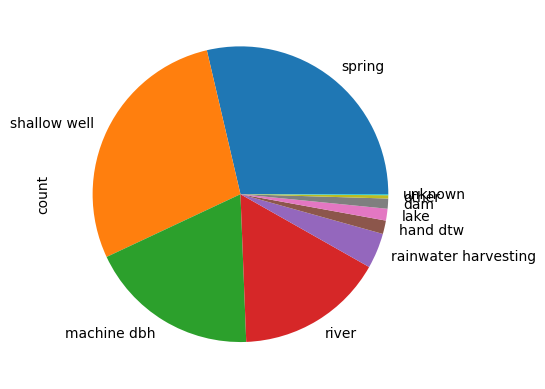

In [28]:
gdf.source.value_counts().plot(kind="pie")

<Axes: xlabel='region'>

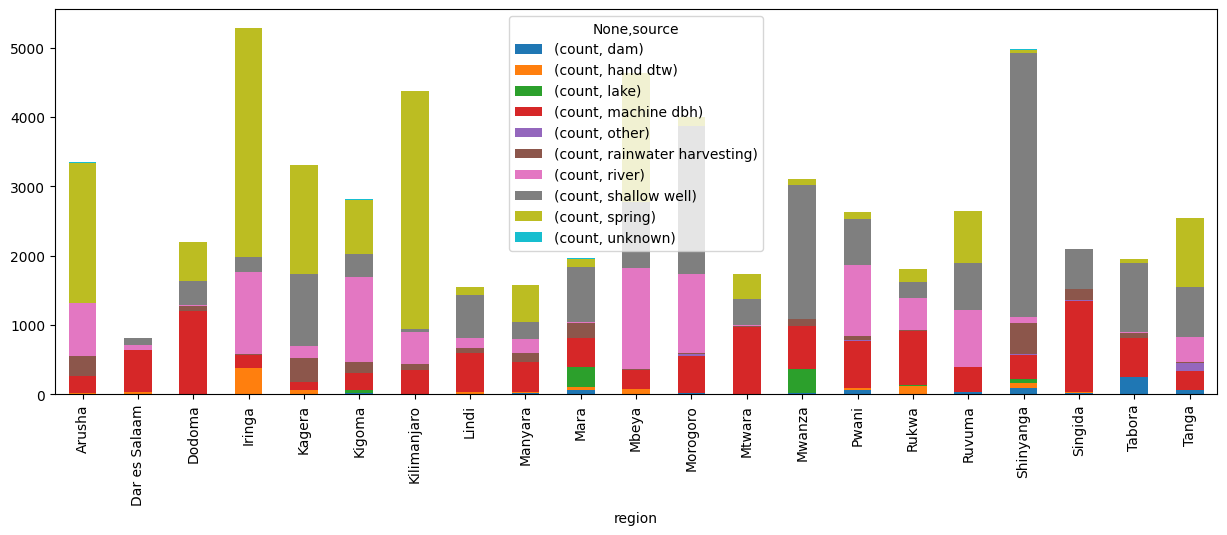

In [29]:
region_source = pd.DataFrame(gdf.groupby("region")["source"].value_counts())
region_source = region_source.unstack("source")
region_source.plot(kind="bar", stacked=True, figsize=[15, 5])

In [30]:
gdf.source.unique()

array(['spring', 'rainwater harvesting', 'dam', 'machine dbh', 'other',
       'shallow well', 'river', 'hand dtw', 'lake', 'unknown'],
      dtype=object)

In [31]:
# status by source spring

test = gdf.loc[gdf["source"] == "spring"]

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group", "source"])

map.save("../output/status_by_spring_source.html")

In [32]:
# status by source shallow well

test = gdf.loc[gdf["source"] == "shallow well"]

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group", "source"])

map.save("../output/status_by_shallow_well_source.html")

In [33]:
# status by source machine dbh

test = gdf.loc[gdf["source"] == "machine dbh"]

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group", "source"])

map.save("../output/status_by_machine_dbh_source.html")

In [34]:
# status by source river

test = gdf.loc[gdf["source"] == "river"]

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group", "source"])

map.save("../output/status_by_river_source.html")

In [35]:
# minority source ('rainwater harvesting', 'dam', 'other', 'hand dtw', 'lake', 'unknown') by region

test = gdf.loc[gdf["source"].isin(['rainwater harvesting', 'dam', 'other', 'hand dtw', 'lake', 'unknown'])]
print(len(test))

map = create_map(gdf=test,
                col_name="source_encoded",
                colors=["blue", "green", "orange", "red", "purple", "brown", "pink", "yellow", "black", "gray"],
                tooltip_field=["id", "construction_year", "status_group", "source"])

map.save("../output/minority_source.html")



# status by minority source ('rainwater harvesting', 'dam', 'other', 'hand dtw', 'lake', 'unknown')
map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group", "source"])

map.save("../output/status_by_minority_source.html")

4868


- source
    - "rainwater harvesting" mostly locates north Tanzania
    - "dam" locates around Shinyanga, Simiyu, Dar es Salaam, Arusha. More non functional than functional.
    - "river" doesn't locates around Lake victoria and Lindi, Mtwara. More functional & need to repair than non functional.
    - "lake" locates mainly around Lake Victoria (a few in Kigoa). Most are non functional.
    - better to use source rather than source_class

### extraction type

<Axes: ylabel='count'>

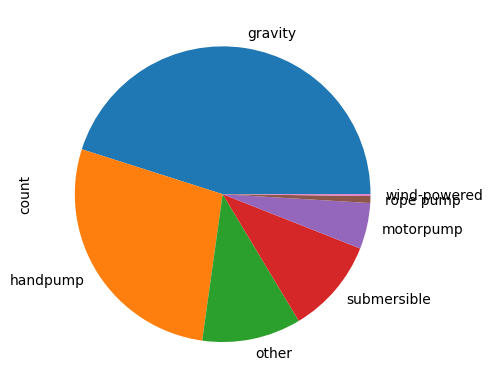

In [36]:
gdf["extraction_type_class"].value_counts().plot(kind="pie")

<Axes: xlabel='region'>

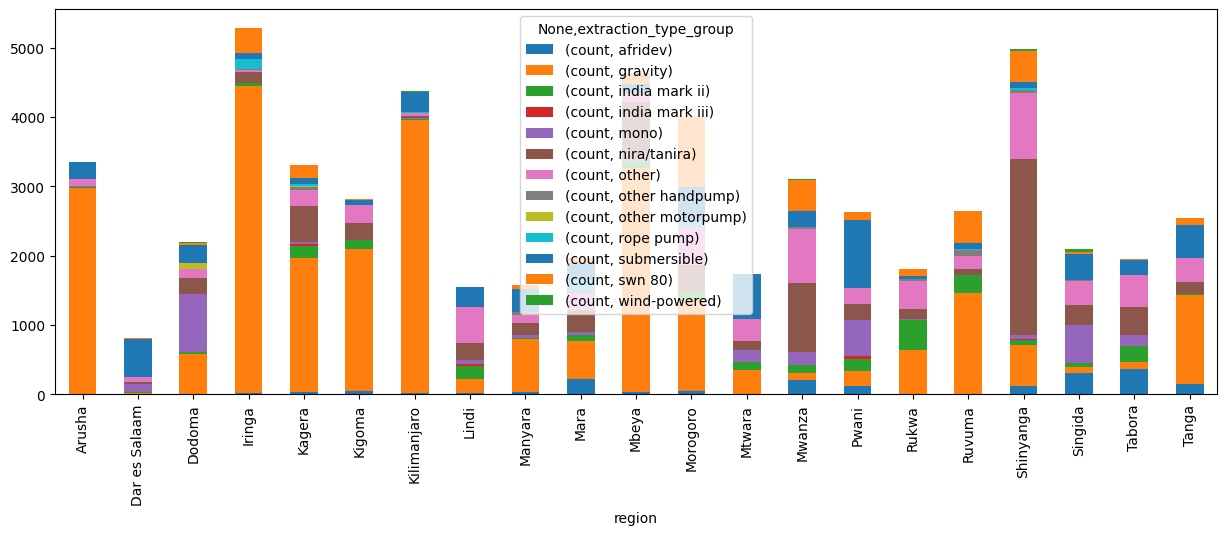

In [37]:
region_extraction = pd.DataFrame(gdf.groupby("region")["extraction_type_group"].value_counts())
region_extraction = region_extraction.unstack("extraction_type_group")
region_extraction.plot(kind="bar", stacked=True, figsize=[15, 5])

<Axes: xlabel='region'>

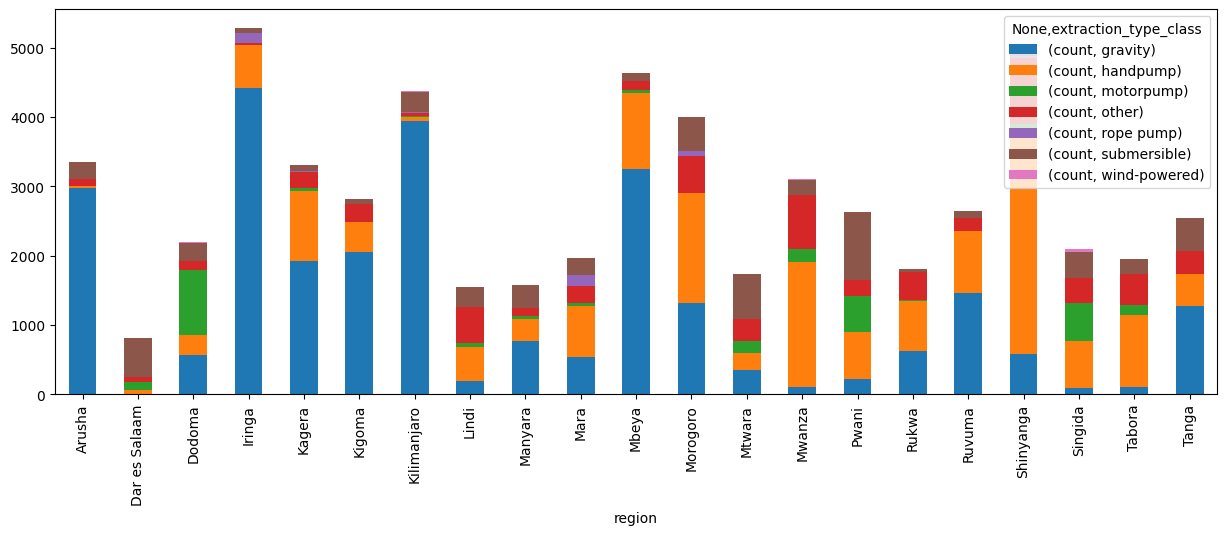

In [38]:
region_extraction = pd.DataFrame(gdf.groupby("region")["extraction_type_class"].value_counts())
region_extraction = region_extraction.unstack("extraction_type_class")
region_extraction.plot(kind="bar", stacked=True, figsize=[15, 5])

In [39]:
# status by extraction type

test = gdf.loc[gdf["extraction_type_class"] == "gravity"]
len(test)

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group", "extraction_type_class"])

map.save("../output/status_by_gravity.html")

In [40]:
# status by extraction type hand pump

test = gdf.loc[gdf["extraction_type_class"] == "handpump"]

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group", "extraction_type_class"])

map.save("../output/status_by_handpump.html")

In [41]:
# status by extraction type submersible

test = gdf.loc[gdf["extraction_type_class"] == "submersible"]

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group", "extraction_type_class"])

map.save("../output/status_by_submersible.html")

In [42]:
# status by extraction type other

test = gdf.loc[gdf["extraction_type_class"] == "other"]

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group", "extraction_type_class"])

map.save("../output/status_by_other.html")

In [43]:
# minority extraction type by region

test = gdf[(gdf["extraction_type_class"] != "handpump") & (gdf["extraction_type_class"] != "gravity") &
           (gdf["extraction_type_class"] != "submersible") & (gdf["extraction_type_class"] != "other")]
len(test)

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["blue", "orange", "green", "red", "purple", "brown", "pink"],
                tooltip_field=["id", "construction_year", "status_group", "extraction_type_class"])

map.save("../output/minority_extraction.html")



# status by extraction type hand pump
map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group", "extraction_type_class"])

map.save("../output/status_by_minority_extraction.html")

- extraction_type
    - submersible locates more in east side
    - motorpump mostly locates Dodoma region and Shinyanga. more non functional
    - wind-powered also locates around, Shinyanga, shingida, dodoma
    - rope pump locates around Mara, Shinyanga, south Kagera, Njombe, border between Iriga and Morogoro
    - "other" is mostly non functional
    - probably okay to use extraction_type_class instead of extraction_type_group. But extraction_type_group could help to model district level

### population

<Axes: xlabel='region'>

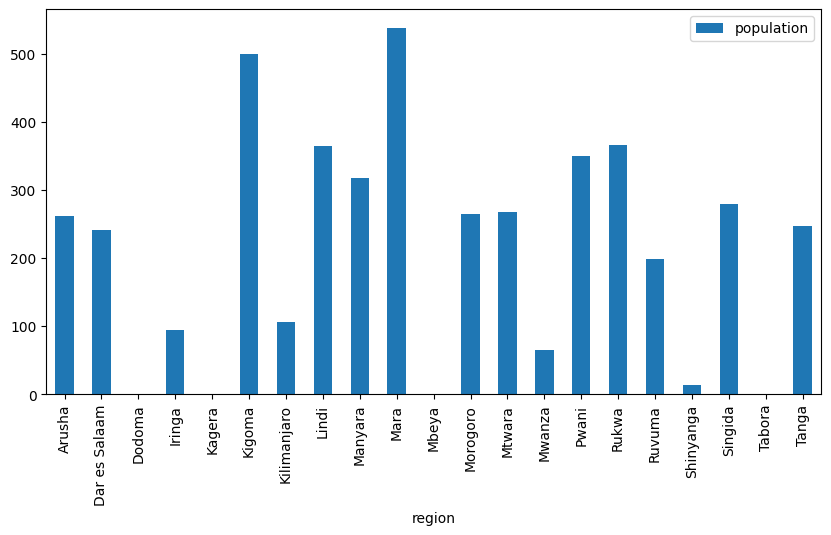

In [44]:
region_population = pd.DataFrame(gdf.groupby("region")["population"].mean())
region_population.plot(kind="bar", stacked=True, figsize=[10, 5])

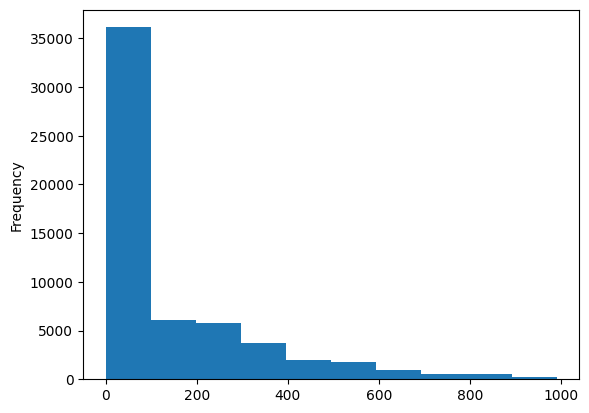

In [45]:
test = gdf.loc[gdf["population"]<1000]
test = test["population"].plot(kind="hist")

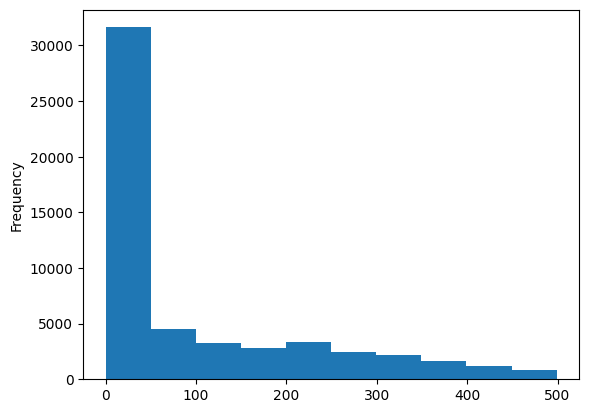

In [46]:
test = gdf.loc[gdf["population"]<500]
test = test["population"].plot(kind="hist")

In [47]:
# status by population > 1000

test = gdf.loc[gdf["population"] > 1000]
len(test)

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group", "population"])

map.save("../output/status_by_population_more_than_1000.html")

In [48]:
# status by population 500 - 1000

test = gdf[(gdf["population"] > 500) & (gdf["population"] <= 1000)]
len(test)

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group", "population"])

map.save("../output/status_by_population_500_to_1000.html")

In [49]:
# status by population 1 - 500

test = gdf[(gdf["population"] > 0) & (gdf["population"] <= 500)]
len(test)

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group", "population"])

map.save("../output/status_by_population_1_to_500.html")

In [50]:
# status by population == 0

test = gdf.loc[gdf["population"] == 0]
len(test)

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group", "population"])

map.save("../output/status_by_population_0.html")

- population
    - more populated place, more functional
    - more non functional while the population is getting small
    - distribution of populaion==0 is similar to year==0

### GPS height

<Axes: xlabel='region'>

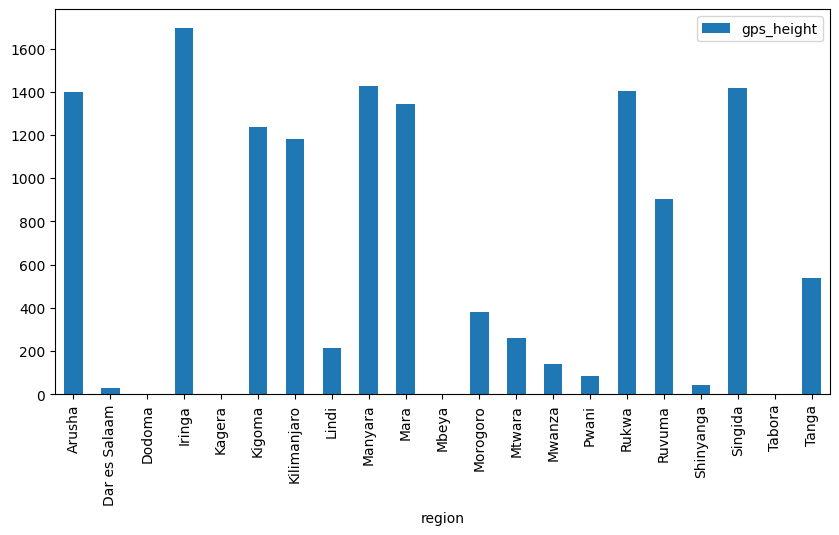

In [51]:
region_gps_height = pd.DataFrame(gdf.groupby("region")["gps_height"].mean())
region_gps_height.plot(kind="bar", stacked=True, figsize=[10, 5])

<Axes: ylabel='Frequency'>

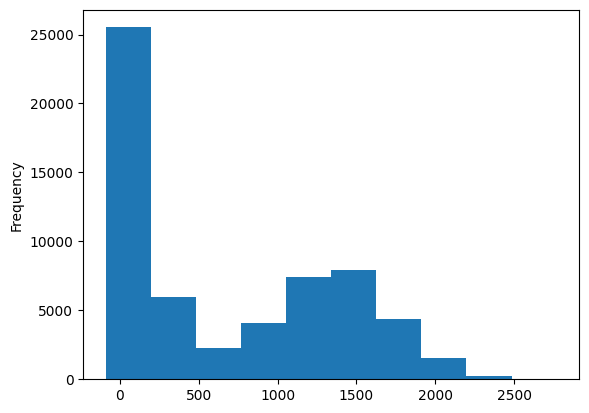

In [52]:
gdf.gps_height.plot(kind="hist")

In [53]:
# status by GPS height > 2000 meter

test = gdf.loc[gdf["gps_height"] > 2000]
len(test)

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group", "gps_height"])

map.save("../output/status_by_gps_height_more_than_2000.html")

In [54]:
# status by GPS height between 1000 - 20000 

test = gdf[(gdf["gps_height"] > 1000) & (gdf["gps_height"] <= 2000)]
len(test)

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group", "gps_height"])

map.save("../output/status_by_gps_height_1000_to_2000.html")

In [55]:
# status by GPS height betweeen 1 - 1000 meter

test = gdf[(gdf["gps_height"] > 1) & (gdf["gps_height"] <= 1000)]
len(test)

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group", "gps_height"])

map.save("../output/status_by_gps_height_1_to_1000.html")

In [56]:
# status by GPS height == 0 meter

test = gdf.loc[gdf["gps_height"] == 0]
len(test)

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group", "gps_height"])

map.save("../output/status_by_gps_height_0.html")

- gps_height
    - more than 2000 meter in Arusha, Njombe, by the lake in Rukwa
    - 1000 - 2000 meter in Arusha, Singida, Mara, Njombe, Rukwa, Kigoma
    - 1-1000 meter in east coast side
    - 0 meter in the same area as year==0 and population==0

### payment

<Axes: xlabel='region'>

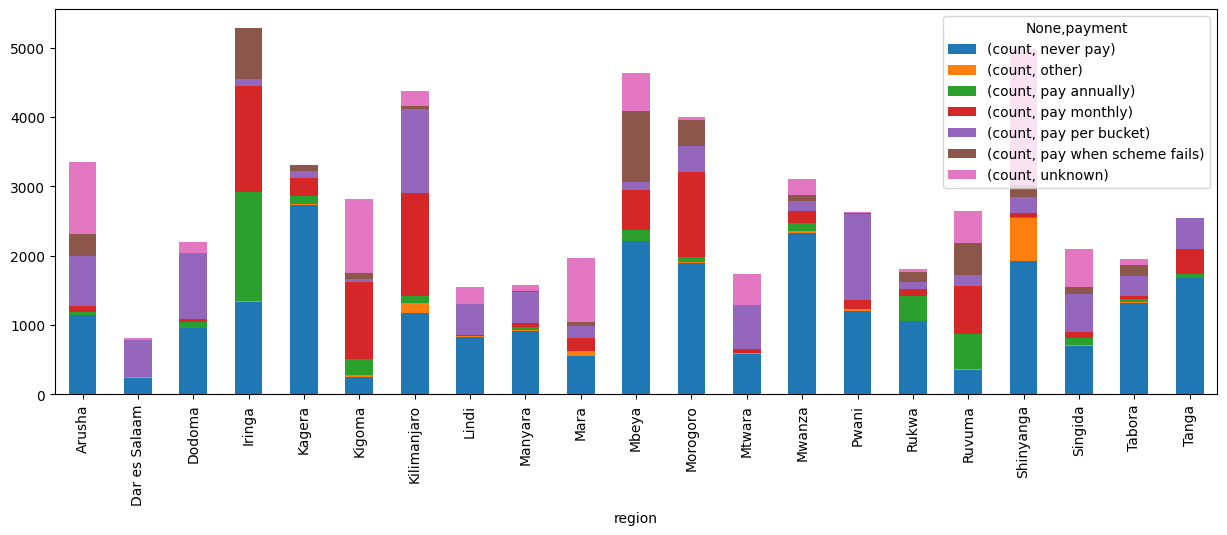

In [57]:
region_pay = pd.DataFrame(gdf.groupby("region")["payment"].value_counts())
region_pay = region_pay.unstack("payment")
region_pay.plot(kind="bar", stacked=True, figsize=[15, 5])

In [58]:
# status by never pay

test = gdf.loc[gdf["payment"]=="never pay"]

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group", "management"])

map.save("../output/never_pay.html")

In [59]:
# status by monthly annually pay

test = gdf.loc[gdf["payment"].isin(["pay monthly", "pay annually"])]

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group", "management"])

map.save("../output/pay_monthly_annually.html")

- payment
    - never pay: more non functional 
    - pay anually, pay monthly: more functional or functional needs to repair

### Waterpoint type

<Axes: xlabel='region'>

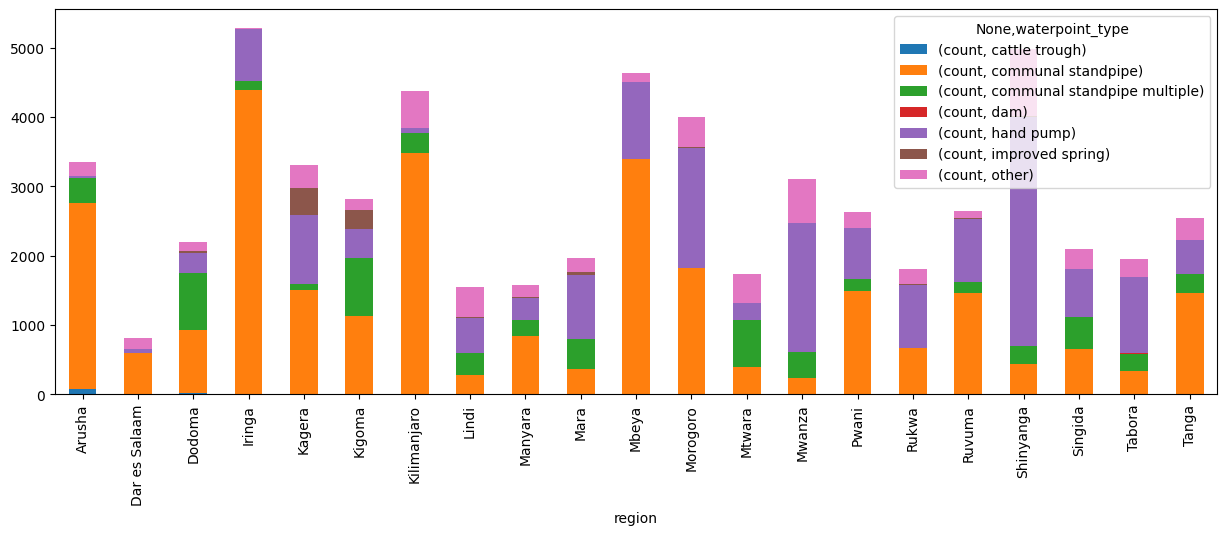

In [60]:
region_wp_type = pd.DataFrame(gdf.groupby("region")["waterpoint_type"].value_counts())
region_wp_type = region_wp_type.unstack("waterpoint_type")
region_wp_type.plot(kind="bar", stacked=True, figsize=[15, 5])

<Axes: xlabel='region'>

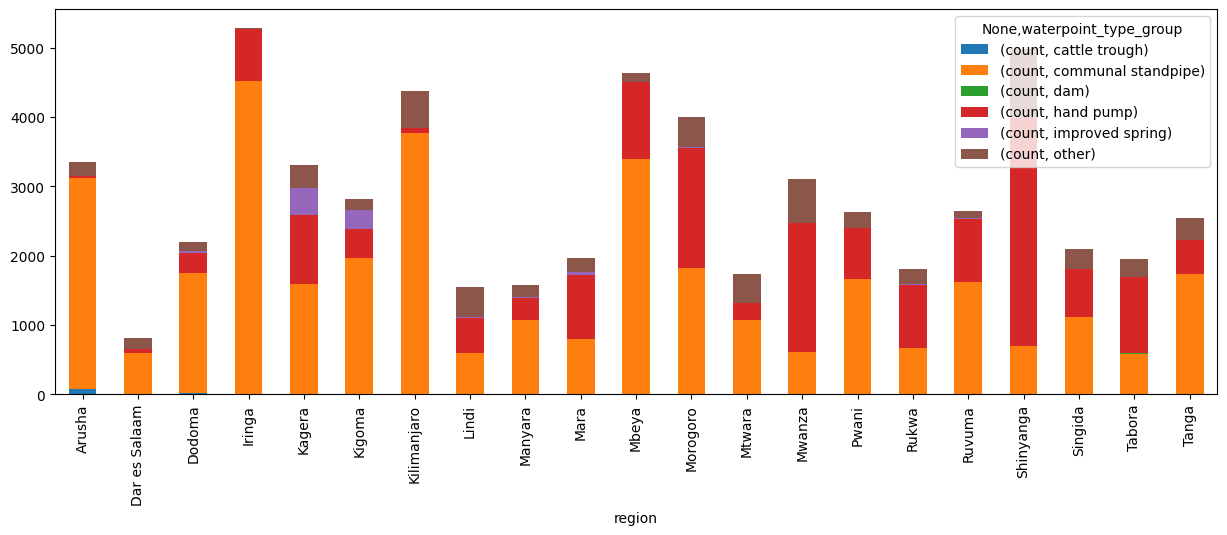

In [61]:
region_wp_type = pd.DataFrame(gdf.groupby("region")["waterpoint_type_group"].value_counts())
region_wp_type = region_wp_type.unstack("waterpoint_type_group")
region_wp_type.plot(kind="bar", stacked=True, figsize=[15, 5])

In [62]:
# waterpoint type by region

map = create_map(gdf = gdf,
                col_name="waterpoint_type_group_encoded",
                colors=["blue", "orange", "green", "red", "purple", "brown"],
                tooltip_field=["id", "status_group", "waterpoint_type_group"])

map.save("../output/waterpoint_type.html")

### management

<Axes: ylabel='count'>

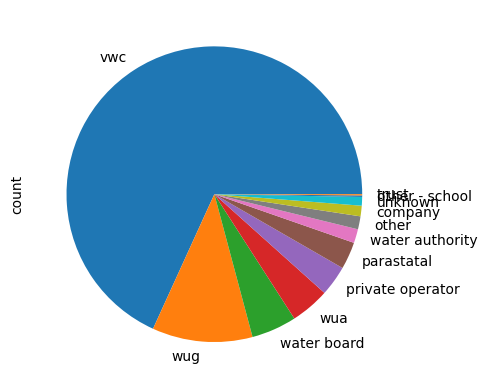

In [63]:
gdf["management"].value_counts().plot(kind="pie")

<Axes: xlabel='region'>

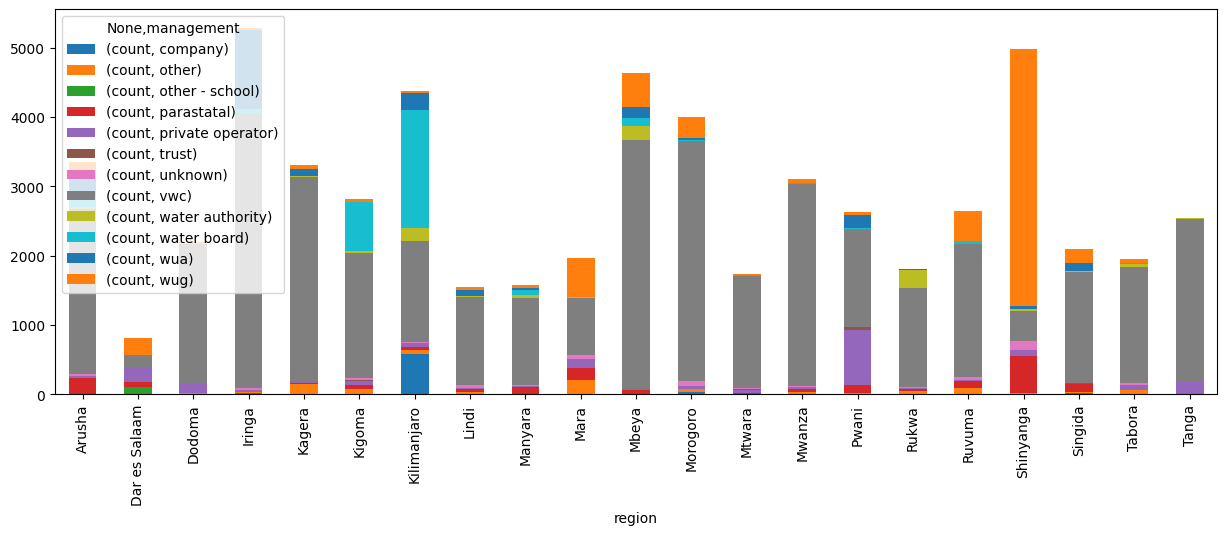

In [64]:
region_manegement = pd.DataFrame(gdf.groupby("region")["management"].value_counts())
region_manegement = region_manegement.unstack("management")
region_manegement.plot(kind="bar", stacked=True, figsize=[15, 5])

In [65]:
# status by watre board, wug, company

test = gdf.loc[gdf["management"].isin(["water board", "wug", "company"])]

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group", "management"])

map.save("../output/status_by_good_management.html")

In [66]:
# status by vwc

test = gdf.loc[gdf["management"].isin(["vwc"])]

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group", "management"])

map.save("../output/status_by_major_management.html")

In [67]:
# status by other management

test = gdf[(gdf["management"] != "vwc") & (gdf["management"] != "water board") &
           (gdf["management"] != "wug") & (gdf["management"] != "company")]

map = create_map(gdf=test,
                col_name="status_group_encoded",
                colors=["green", "red", "yellow"],
                tooltip_field=["id", "construction_year", "status_group", "management"])

map.save("../output/status_by_other_management.html")

- management
    - water board, wug, company: more functional
    - vwc: slightly more non functional

### Summary

- construction_year, population, gps_height are zero in between Lake Lukwa and Lake Malawi, Dodoma, North West area
    - -> zero value means missing data
    - those pump tend to be hand pump, (motor pump in Dodoma)

- Killimanjaro, Tanga, Morogoro, Pwani, Dar es Salaam, Lindi, Mtwara, Ruvuma are low elevation place (ca. up to 1000 meter).

- More likely **non functional** if...
    - more water pump is **aged** (older than built in 2000)
    - water quality **isn't good** (i.e. coast side(salty), Misungi & Shinyanga & Geita (milky), Arusha (fluoride), Singida (unknown))
    - quantity is **dry or unknown** 
    - source is **lake**
    - payment is **never pay**
    - extraction type is **motor pump or other**
    - location is in **Mtwara, Rukwa, near Lake Victoria, border side around Kilimanjaro park** 

- More likely **functional** if...
    - water pump locates **along the river going through Njombe, Mbeya, Iringa, or non-border side around Kilimanjaro park**
    - source is **spring or river**
    - management is **water board, wug, or company**

- More likely **functional needs to be repair** if...
    - watre pump locates **near country boarder in Kigoma, or Simiyu**
    - source is **river**
